# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [92]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import scipy.stats
import scipy.stats
from scipy.stats import trim_mean
from scipy import stats
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [93]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [94]:
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [95]:
mtcar.shape

(32, 12)

In [96]:
mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [97]:
mtcar_df = mtcar.copy()

In [98]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [99]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [100]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [101]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

18.81642857142857

In [102]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

hp
vs am                
S  Auto    102.142857
   Manual   80.571429
V  Auto    194.166667
   Manual  180.833333

In [103]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [104]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [105]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

mpg       disp
am     vs                     
Auto   S   2.471071  49.130725
       V   2.774396  71.823494
Manual S   4.757701  18.802128
       V   4.008865  95.233616

In [106]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [107]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

,hp,disp
am,,
Auto,53.908196,110.171647
Manual,84.062324,87.203989


In [108]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

qsec                                 
          count    min    max   mean   std   sem
am     vs                                       
Auto   S      7  18.30  22.90  19.97  1.46  0.55
       V     12  15.41  18.00  17.14  0.80  0.23
Manual S      7  16.90  19.90  18.70  0.95  0.36
       V      6  14.50  17.02  15.80  1.09  0.45

In [109]:
mtcar_df.isna().sum()

Car Model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

Dealing with NA 

In [110]:
# mtcar_df.head(15)

In [111]:
# mtcar_df["mpg"].mean()

In [112]:
# mtcar_df["mpg"].iloc[1:10] = None

In [113]:
# mtcar_df.head(15)

In [114]:
# mtcar_df["mpg"].mean()

<AxesSubplot:xlabel='mpg', ylabel='Count'>

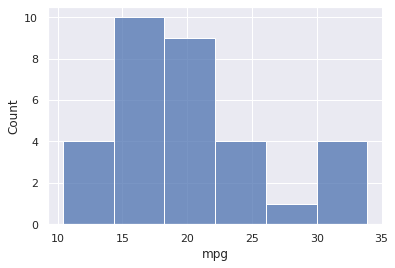

In [115]:
sns.histplot(mtcar_df["mpg"])

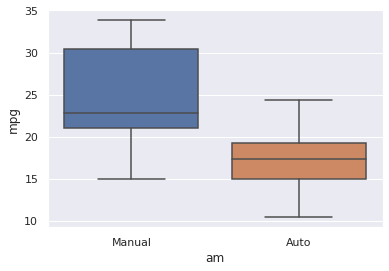

In [116]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

<AxesSubplot:xlabel='mpg', ylabel='hp'>

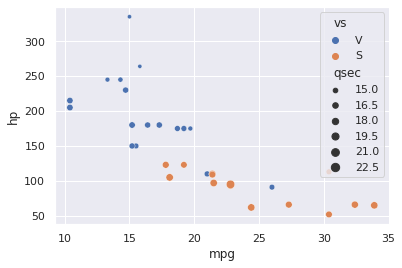

In [117]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

<AxesSubplot:xlabel='mpg', ylabel='disp'>

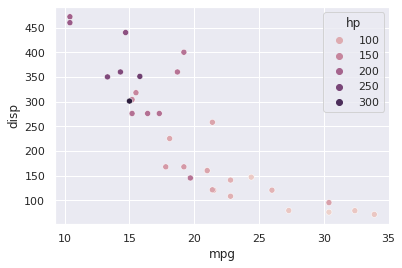

In [118]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

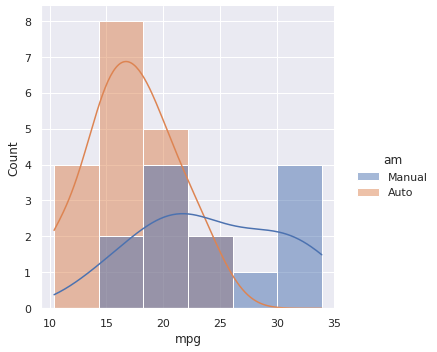

In [119]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

In [120]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


In [121]:
d = mtcar_df.groupby(["vs", "am"])["am"].count().unstack()
d

am,Auto,Manual
vs,,
S,7,7
V,12,6


In [122]:
p_value = scipy.stats.fisher_exact(d)[1]

In [123]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# mtcar_path = PATH_TO_DATA + "mtcars.csv"
# mtcar = pd.read_csv(mtcar_path)
# d = mtcar.groupby(["vs", "am"])["am"].count().unstack()
# p_value = scipy.stats.fisher_exact(d)[1]

### NEW DATASET 

In [124]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [125]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [126]:
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [127]:
airquality_df = airquality.copy()

In [128]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

,Ozone,Solar.R,Wind,Temp,Month,Day
61,135.0,269.0,4.1,84,7,1
62,49.0,248.0,9.2,85,7,2
63,32.0,236.0,9.2,81,7,3
64,NaN,101.0,10.9,84,7,4
65,64.0,175.0,4.6,83,7,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [129]:
aq_ss = airquality_df.query("Month >= 7")

In [130]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

,Ozone
Month,
7,26
8,26
9,29


<AxesSubplot:xlabel='Month', ylabel='Ozone'>

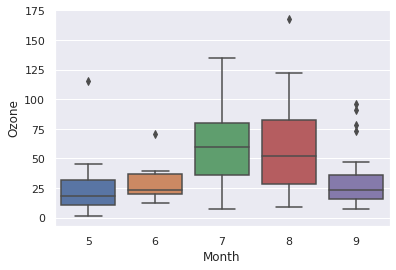

In [131]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [132]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path, index_col=0)

In [133]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [134]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [135]:
iris.agg("std")

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [136]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

Sepal.Length    6.50
Petal.Length    5.55
Sepal.Width     3.00
Petal.Width     2.00
dtype: float64

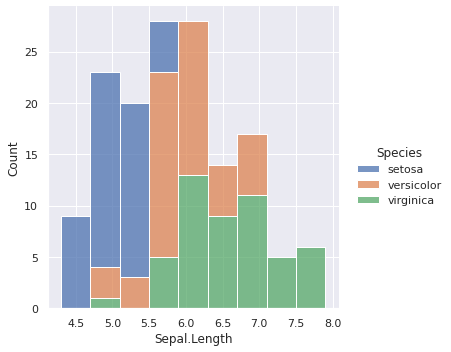

In [137]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

In [138]:
iris_df = iris[iris.Species != "setosa"]

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

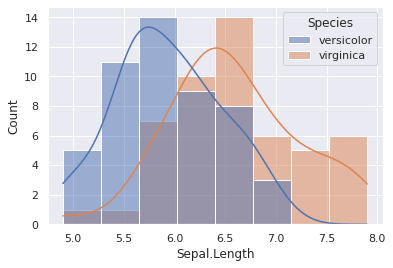

In [139]:
sns.histplot(iris_df, x="Sepal.Length", kde=True, hue="Species")

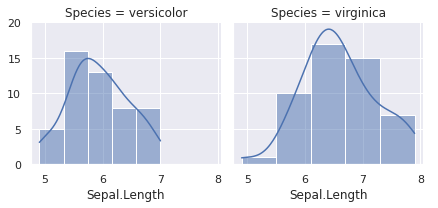

In [140]:
g = sns.FacetGrid(iris_df, col="Species")
g.map(sns.histplot, "Sepal.Length", kde=True, bins=5)
g.add_legend()

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid - IMBA

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

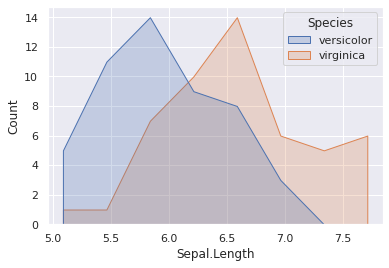

In [141]:
sns.histplot(iris_df, x="Sepal.Length", hue="Species", element="poly") 

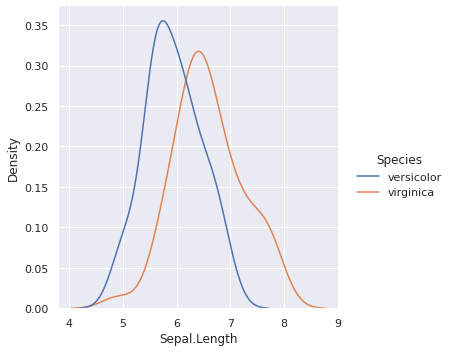

In [142]:
sns.displot(iris_df, x="Sepal.Length", hue="Species", kind="kde")

<AxesSubplot:xlabel='Sepal.Length', ylabel='Density'>

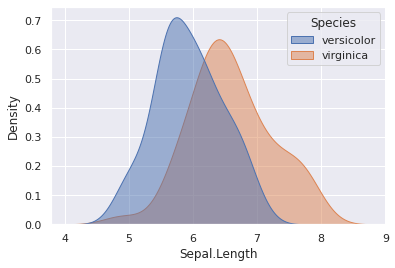

In [143]:
sns.kdeplot(data=iris_df, x="Sepal.Length", hue="Species", fill=True, common_norm=False, alpha=.5, linewidth=1)

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

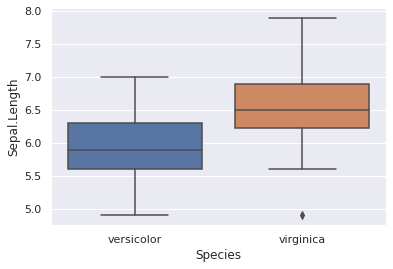

In [144]:
sns.set_theme(style="darkgrid")
sns.boxplot(y="Sepal.Length", x="Species", data=iris_df)

In [145]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(iris_df["Sepal.Length"])
shapiro_test

ShapiroResult(statistic=0.9805403351783752, pvalue=0.1464301496744156)

In [146]:
shapiro_test_1 = stats.shapiro(iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
shapiro_test_2 = stats.shapiro(iris_df[iris_df.Species == "virginica"]["Sepal.Length"])
[shapiro_test_1, shapiro_test_2]

[ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867),
 ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)]

In [147]:
# Perform Bartlett’s test for equal variances.
# Гомогенность дисперсии проверяем, короче.
stat, p = scipy.stats.bartlett(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

The test statistic is 2.094933311010139. 
The p-value of the test is 0.14778816016231236.


In [148]:
# Calculate the T-test for the means of two independent samples of scores.
t_test = scipy.stats.ttest_ind(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]) #, equal_var=True
t_test

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

In [149]:
# Проверяем гипотезу о том, что среднее значение длины чашелистика в генеральной совокупности (датасете) равно 8.
# Для этого используем одновыборочный Т-тест. 
t_test = scipy.stats.ttest_1samp(iris_df["Sepal.Length"], 8) 
t_test

Ttest_1sampResult(statistic=-26.22072564309469, pvalue=2.3864526432268e-46)

Как и следовало ожидать - нет, среднее значение "Sepal.Length" не равно 8.

In [150]:
import numpy as np
import scipy.stats

# Самописная фукнция с просторов интернета, которая вычисляет доверительный интервал. Полезно!
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [151]:
mean_confidence_interval(iris_df["Sepal.Length"])

(6.2620000000000005, 6.130479266795949, 6.393520733204052)

In [152]:
# Расчёт доверительных интервалов
import numpy as np, scipy.stats as st

a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]

print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),
      st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b)))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=scipy%20stats%20t#scipy.stats.t

(5.789305783299542, 6.082694216700458) (6.4072850193549105, 6.768714980645086)


In [153]:
print(mean_confidence_interval(a),
      mean_confidence_interval(b))

(5.936, 5.789305783299542, 6.082694216700458) (6.587999999999998, 6.4072850193549105, 6.768714980645086)


Вывод - самописная функция повторяет метод .interval из библиотеки scipy.

Отлично!

In [154]:
print(a.quantile([0.05, 0.95]), "\n\n",
      b.quantile([0.05, 0.95]))
print("\n\n")
print(iris_df["Sepal.Length"].quantile([0.05, 0.95]))

0.05    5.045
0.95    6.755
Name: Sepal.Length, dtype: float64 

 0.05    5.745
0.95    7.700
Name: Sepal.Length, dtype: float64



0.05    5.195
0.95    7.605
Name: Sepal.Length, dtype: float64


Итого - метод квантиль какой-то странный. Что-то тут не так, очевидно. Лучше его не использовать. 

Надо бы разобраться, почему такая разница.

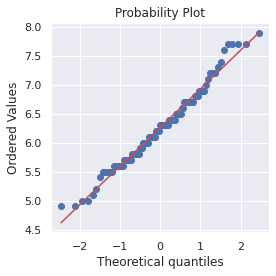

In [155]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(iris_df["Sepal.Length"], plot=ax)

plt.tight_layout()
plt.show()

In [156]:
# Парный Т-тест
pt_test = scipy.stats.ttest_rel(iris_df["Sepal.Length"], iris_df["Sepal.Width"])
pt_test

Ttest_relResult(statistic=61.30714401143194, pvalue=1.4790717979416083e-80)

Для визуализации "планок погрешностей" можно использовать:

- matplotlib, а именно matplotlib.pyplot.errorbar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

- seaborn.pointplot: https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [157]:
iris_df.Species.unique()

array(['versicolor', 'virginica'], dtype=object)

In [158]:
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
a

5.936

<ErrorbarContainer object of 3 artists>

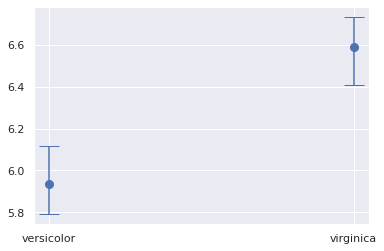

In [159]:
# Хехе, получилось!
a_origin = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
b_origin = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"].mean()

plt.errorbar(x=iris_df.Species.unique(), y=[a, b], 
             yerr=[a-st.t.interval(0.95, len(a_origin)-1, loc=np.mean(a_origin), scale=st.sem(a_origin)), 
                  b-st.t.interval(0.95, len(b_origin)-1, loc=np.mean(b_origin), scale=st.sem(b_origin))],
             data=iris_df, fmt="o", markersize=8, capsize=10) # fmt="-o", "--o", ".k"

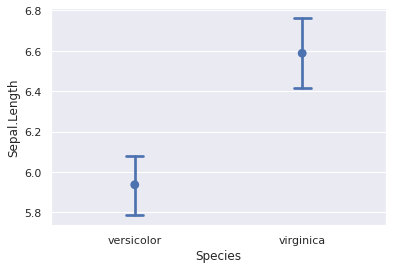

In [160]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Species", y="Sepal.Length", data=iris_df, join=False, capsize=.1)

In [161]:
# Непараметрический тест на нормальность (Манна-Уитни), в англоязычной литературе - Уилкоксона
wtest = scipy.stats.wilcoxon(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                            iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(wtest)
mw_test = scipy.stats.mannwhitneyu(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                                   iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(mw_test)
# Получается, что реализации этих тестов различаются в R и Python. Подробности по ссылке:
# https://stackoverflow.com/questions/33579785/difference-between-wilcoxon-test-in-r-and-python
# Вывод - Можно использовать и Python, но если p-value различаются, то лучше полагаться на R.
# Однако, немаловажно отметить, что тест Бартлетта и Т-тест совпадают. 

WilcoxonResult(statistic=171.0, pvalue=1.883485656410222e-05)
MannwhitneyuResult(statistic=526.0, pvalue=2.9345032053320985e-07)


In [163]:
model_iris = smf.ols('iris["Sepal.Width"] ~ Species', data=iris).fit()
model_iris.summary() if str(input()) == "1" else print(model_iris.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     iris["Sepal.Width"]   R-squared:                       0.401
Model:                             OLS   Adj. R-squared:                  0.393
Method:                  Least Squares   F-statistic:                     49.16
Date:                 Mon, 02 Nov 2020   Prob (F-statistic):           4.49e-17
Time:                         21:22:30   Log-Likelihood:                -49.366
No. Observations:                  150   AIC:                             104.7
Df Residuals:                      147   BIC:                             113.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.4280      0.048     71.359      0.000       3.333       3.523
Species[T.versicolor]    -0.6580      0.068     -9.685      0.000      -0.792      -0.524
Species[T.virginica]     -0.4540      0.068     -6.683      0.000      -0.588      -0.320
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.632
Skew:                           0.027   Prob(JB):                        0.442
Kurtosis:                       3.508   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
aov_table_iris = sm.stats.anova_lm(model_iris)
aov_table_iris

,df,sum_sq,mean_sq,F,PR(>F)
Species,2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


In [168]:
tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris["Sepal.Width"], groups=iris["Species"])
print(tukey_test_result_iris)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


In [ ]:
# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15 (1).txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# df.head()

In [ ]:
# stat, p = scipy.stats.bartlett(df[df.V2 == 1]["V1"], 
#                                df[df.V2 == 2]["V1"])
# print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# wtest = scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], 
#                              df[df.V2 == 2]["V1"], mode='approx')
# wtest

In [ ]:
# scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print(scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]) if (scipy.stats.bartlett(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1] < 0.05) else print(scipy.stats.ttest_ind(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1])

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_16.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print("{} {} {}".format(df.V1.mean(),df.V2.mean(),scipy.stats.ttest_ind(df.V1, df.V2)[1])) if (scipy.stats.ttest_ind(df.V1, df.V2)[1] < 0.05) else print("The difference is not significant")

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
tooth_path = DATA + "ToothGrowth.csv"
toothgrowth = pd.read_csv(tooth_path, index_col=0)

In [ ]:
toothgrowth.head(10)

In [ ]:
toothgrowth.shape

In [ ]:
toothgrowth.describe()

In [ ]:
subset_oj = toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)]
subset_vc = toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)]

In [ ]:
t_test = scipy.stats.ttest_ind(subset_oj.len, subset_vc.len) 
t_test.statistic

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# t_test = scipy.stats.ttest_ind(toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)].len, 
#                                toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)].len) 
# print(t_test.statistic)

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
lec_path = DATA + "lekarstva.csv"
lekarstva = pd.read_csv(lec_path, index_col=0)

In [ ]:
print(lekarstva.shape)
lekarstva.head()

In [ ]:
lekarstva.describe()

In [ ]:
lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_after, lekarstva.Pressure_before) 
lec_pair_t_test.statistic

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# lec_path = PATH_TO_DATA + "lekarstva.csv"
# lekarstva = pd.read_csv(lec_path, index_col=0)
# lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_before, lekarstva.Pressure_after) 
# print(lec_pair_t_test.statistic)

## NEW CHAPTER AND NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [ ]:
grants.head()

In [ ]:
grants.shape

In [ ]:
grants.isna().sum()

In [ ]:
grants.describe()

In [ ]:
grants_df = grants.copy()

In [ ]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [ ]:
grants_df["status"].unique()

In [ ]:
grants_df.head(3)

In [ ]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

In [ ]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

In [ ]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [ ]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

In [ ]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

In [ ]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

In [ ]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

### New Dataset

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [ ]:
hec = hec.drop("Unnamed: 0", axis=1)

In [ ]:
hec.head()

In [ ]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

In [ ]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

In [ ]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [ ]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [ ]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

In [ ]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

In [ ]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

### New Dataset

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

In [ ]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

In [ ]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [ ]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
print(d.shape)
d

In [ ]:
# НЕПРАВИЛЬНО!

# chisquare_result = scipy.stats.chisquare(d, axis=None)
# chisquare_result
# -------------------------------------------------------------
# ПРАВИЛЬНО!
chisquare_result = scipy.stats.chi2_contingency(d)
chisquare_result

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result

In [ ]:
# table_diamonds = pd.pivot_table(diamonds, index=["cut"], columns=["color"], aggfunc="count")
# table_diamonds

In [ ]:
diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)

In [ ]:
d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
d

In [ ]:
chisquare_result = scipy.stats.chi2_contingency(d)
chisquare_result[0]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import numpy as np
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
# diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)
# d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result[0]

### Game: Megafon and N+1
#### https://nplus1.ru/material/2020/10/27/megafon

In [ ]:
import re

In [ ]:
PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"
game_df_1 = pd.read_csv(PATH_TO_DATA + "first.csv", sep=";", header=None)
game_df_1.head(10)

In [ ]:
game_df_1.columns = ["transaction_id", "company_name", "transaction_amount", "comment"]
game_df_1

In [ ]:
type(game_df_1.iloc[:,1])

In [ ]:
game_df_1[game_df_1.iloc[:,1].str.contains(r'([a-z|0-9]{8})(-[a-z|0-9]{4}){3}(-[a-z|0-9]{12})', regex=True)]

In [ ]:
# PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"

game_df_2 = pd.read_csv(PATH_TO_DATA + "dva.csv", sep=";", verbose=True)
game_df_2.head(10)

# NEW CHAPTER
# ANOVA

Он же - дисперсионный анализ: однофакторный и многофакторный.

In [28]:
import sys

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

In [3]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops = pd.read_csv(shops_path, index_col=0)
shops.head()

,price,store,origin
food,,,
chocolate,100.30,supermarket,russia
chocolate,55.57,minimarket,russia
chocolate,268.62,minimarket,import
chocolate,196.81,supermarket,import
bread,10.91,minimarket,russia


In [4]:
shops.index.unique()

Index(['chocolate', 'bread', 'vegetables', 'fruits', 'cheese'], dtype='object', name='food')

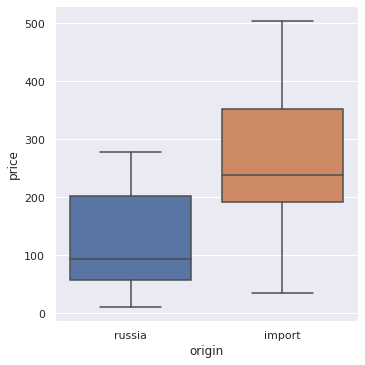

In [5]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="origin", y="price", data=shops, kind="box")

In [6]:
model = smf.ols('price ~ origin', data=shops).fit()
model.summary() if str(input()) == "1" else print(model.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     6.650
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0189
Time:                        18:54:59   Log-Likelihood:                -122.90
No. Observations:                  20   AIC:                             249.8
Df Residuals:                      18   BIC:                             251.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          261.3700     37.619      6.948      0.000     182.336     340.404
origin[T.russia]  -137.1910     53.201     -2.579      0.019    -248.962     -25.420
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.335
Skew:                           0.191   Prob(JB):                        0.846
Kurtosis:                       2.495   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,6.649892,0.018926
Residual,18.0,254729.450490,14151.636138,NaN,NaN


In [8]:
model_2 = smf.ols('price ~ origin + store', data=shops).fit()
model_2.summary() if str(input()) == "1" else print(model_2.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.278
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0625
Time:                        18:55:00   Log-Likelihood:                -122.78
No. Observations:                  20   AIC:                             251.6
Df Residuals:                      17   BIC:                             254.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              273.5785     47.131      5.805      0.000     174.141     373.016
origin[T.russia]      -137.1910     54.422     -2.521      0.022    -252.011     -22.371
store[T.supermarket]   -24.4170     54.422     -0.449      0.659    -139.237      90.403
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.500
Skew:                           0.175   Prob(JB):                        0.779
Kurtosis:                       2.309   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
aov_table_2 = sm.stats.anova_lm(model_2)
aov_table_2

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,6.354820,0.021987
store,1.0,2980.949445,2980.949445,0.201297,0.659342
Residual,17.0,251748.501045,14808.735356,NaN,NaN


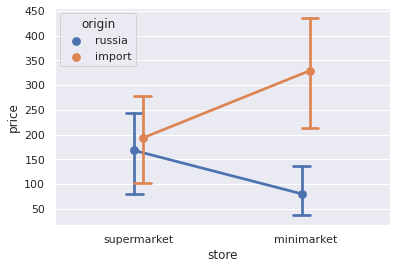

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="store", y="price", hue="origin", data=shops, join=True, capsize=.1, dodge=True)

In [11]:
model_3 = smf.ols('price ~ origin + store + origin:store', data=shops).fit() # same result: 'price ~ origin * store' 
model_3.summary() if str(input()) == "1" else print(model_3.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4.512
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0178
Time:                        18:55:02   Log-Likelihood:                -119.91
No. Observations:                  20   AIC:                             247.8
Df Residuals:                      16   BIC:                             251.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               329.6040     48.602      6.782      0.000     226.573     432.635
origin[T.russia]                       -249.2420     68.733     -3.626      0.002    -394.950    -103.534
store[T.supermarket]                   -136.4680     68.733     -1.985      0.065    -282.176       9.240
origin[T.russia]:store[T.supermarket]   224.1020     97.204      2.305      0.035      18.039     430.165
==============================================================================
Omnibus:                        0.595   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.468
Skew:                          -0.338   Prob(JB):                        0.791
Kurtosis:                       2.675   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
aov_table_3 = sm.stats.anova_lm(model_3)
aov_table_3

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,7.967925,0.012252
store,1.0,2980.949445,2980.949445,0.252394,0.622238
origin:store,1.0,62777.133005,62777.133005,5.315272,0.034867
Residual,16.0,188971.368040,11810.710503,NaN,NaN


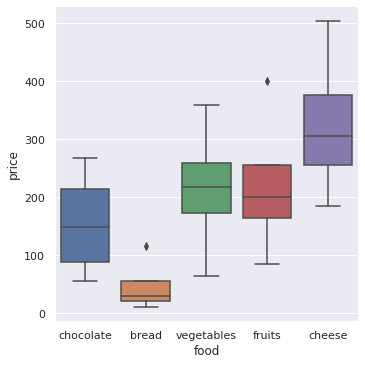

In [23]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x=shops.index, y="price", data=shops, kind="box")

In [25]:
model_4 = smf.ols('price ~ shops.index', data=shops).fit() 
model_4.summary() if str(input()) == "1" else print(model_4.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3.398
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0362
Time:                        20:33:16   Log-Likelihood:                -119.59
No. Observations:                  20   AIC:                             249.2
Df Residuals:                      15   BIC:                             254.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    47.1050     55.229      0.853      0.407     -70.612     164.822
shops.index[T.cheese]       278.0525     78.105      3.560      0.003     111.575     444.530
shops.index[T.chocolate]    108.2200     78.105      1.386      0.186     -58.257     274.697
shops.index[T.fruits]       174.3125     78.105      2.232      0.041       7.835     340.790
shops.index[T.vegetables]   167.7625     78.105      2.148      0.048       1.285     334.240
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.733
Skew:                           0.360   Prob(JB):                        0.693
Kurtosis:                       2.398   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
aov_table_4 = sm.stats.anova_lm(model_4)
aov_table_4

,df,sum_sq,mean_sq,F,PR(>F)
shops.index,4.0,165823.396270,41455.849068,3.397781,0.036175
Residual,15.0,183012.906625,12200.860442,NaN,NaN


In [90]:
# Не работает. По причине того, что индекс имеет текстовый формат. Пришлось перезагружать датасет с другим индексом.
# tukey_test_result = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops.index.unique(), groups="price")

In [81]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops_2 = pd.read_csv(shops_path)
shops_2.head()

,food,price,store,origin
0,chocolate,100.30,supermarket,russia
1,chocolate,55.57,minimarket,russia
2,chocolate,268.62,minimarket,import
3,chocolate,196.81,supermarket,import
4,bread,10.91,minimarket,russia


In [174]:
tukey_test_result_shops = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops_2["price"], groups=shops_2["food"])
print(tukey_test_result_shops)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2    meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
    bread     cheese  278.0525 0.0204   36.8408 519.2642   True
    bread  chocolate    108.22 0.6312 -132.9917 349.4317  False
    bread     fruits  174.3125  0.221  -66.8992 415.5242  False
    bread vegetables  167.7625 0.2513  -73.4492 408.9742  False
   cheese  chocolate -169.8325 0.2414 -411.0442  71.3792  False
   cheese     fruits   -103.74 0.6616 -344.9517 137.4717  False
   cheese vegetables   -110.29 0.6172 -351.5017 130.9217  False
chocolate     fruits   66.0925    0.9 -175.1192 307.3042  False
chocolate vegetables   59.5425    0.9 -181.6692 300.7542  False
   fruits vegetables     -6.55    0.9 -247.7617 234.6617  False
---------------------------------------------------------------


In [179]:
# tukey_test_result_shops

### NEW DATASET

In [13]:
DATA = "~/PycharmProjects/Datasets/"
npk_path = DATA + "npk.csv"
npk = pd.read_csv(npk_path, index_col=0)
npk = npk.rename(columns={"yield" : "growth"})
npk.head()

,block,N,P,K,growth
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57.0
5,2,1,0,0,59.8


In [14]:
model_npk = smf.ols('growth ~ N * P', data=npk).fit()
model_npk.summary() if str(input()) == "1" else print(model_npk.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.221
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.117
Time:                        18:55:02   Log-Likelihood:                -73.777
No. Observations:                  24   AIC:                             155.6
Df Residuals:                      20   BIC:                             160.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.7167      2.341     22.096      0.000      46.834      56.599
N              7.5000      3.310      2.266      0.035       0.595      14.405
P              0.7000      3.310      0.211      0.835      -6.205       7.605
N:P           -3.7667      4.681     -0.805      0.430     -13.531       5.998
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.399
Skew:                           0.135   Prob(JB):                        0.819
Kurtosis:                       2.429   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
aov_table_npk = sm.stats.anova_lm(model_npk)
aov_table_npk.unstack()["PR(>F)"]["N:P"]

0.4304878274077424

In [16]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [17]:
model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
model_npk_2.summary() if str(input()) == "1" else print(model_npk_2.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     3.346
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0397
Time:                        18:55:03   Log-Likelihood:                -72.346
No. Observations:                  24   AIC:                             152.7
Df Residuals:                      20   BIC:                             157.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6500      2.205     24.784      0.000      50.050      59.250
N              5.6167      2.205      2.547      0.019       1.017      10.216
P             -1.1833      2.205     -0.537      0.597      -5.783       3.416
K             -3.9833      2.205     -1.806      0.086      -8.583       0.616
==============================================================================
Omnibus:                        0.220   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.414
Skew:                          -0.127   Prob(JB):                        0.813
Kurtosis:                       2.409   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
aov_table_npk_2.unstack()["PR(>F)"]

N           0.019193
P           0.597434
K           0.085921
Residual         NaN
dtype: float64

In [19]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"})
# model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
# aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
# aov_table_npk_2.unstack()["PR(>F)"]